#**How to Train YOLO11 Object Detection Model on a Custom Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data: https://universe.roboflow.com/project-uyrxf/ppe_detection-v1x3l/dataset/1#

In [ ]:
!nvidia-smi

Wed Oct  2 14:18:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 45.3 MB/s eta 0:00:00


**Step 02 # Import All the Requried Libraries**

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NIWcStaa1TTkkZqiWpeN")
project = rf.workspace("mohammad-muzammil-shah-wpk02").project("uniform-detection-gkx2q")
version = project.version(3)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to uniform-detection-3 in yolov11:: 100%|██████████| 176/176 [00:00<00:00, 7555.06it/s]


In [ ]:
dataset.location

'/content/uniform-detection-3'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 289MB/s]
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/uniform-detection-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

**Step # 05 Examine Training Results**

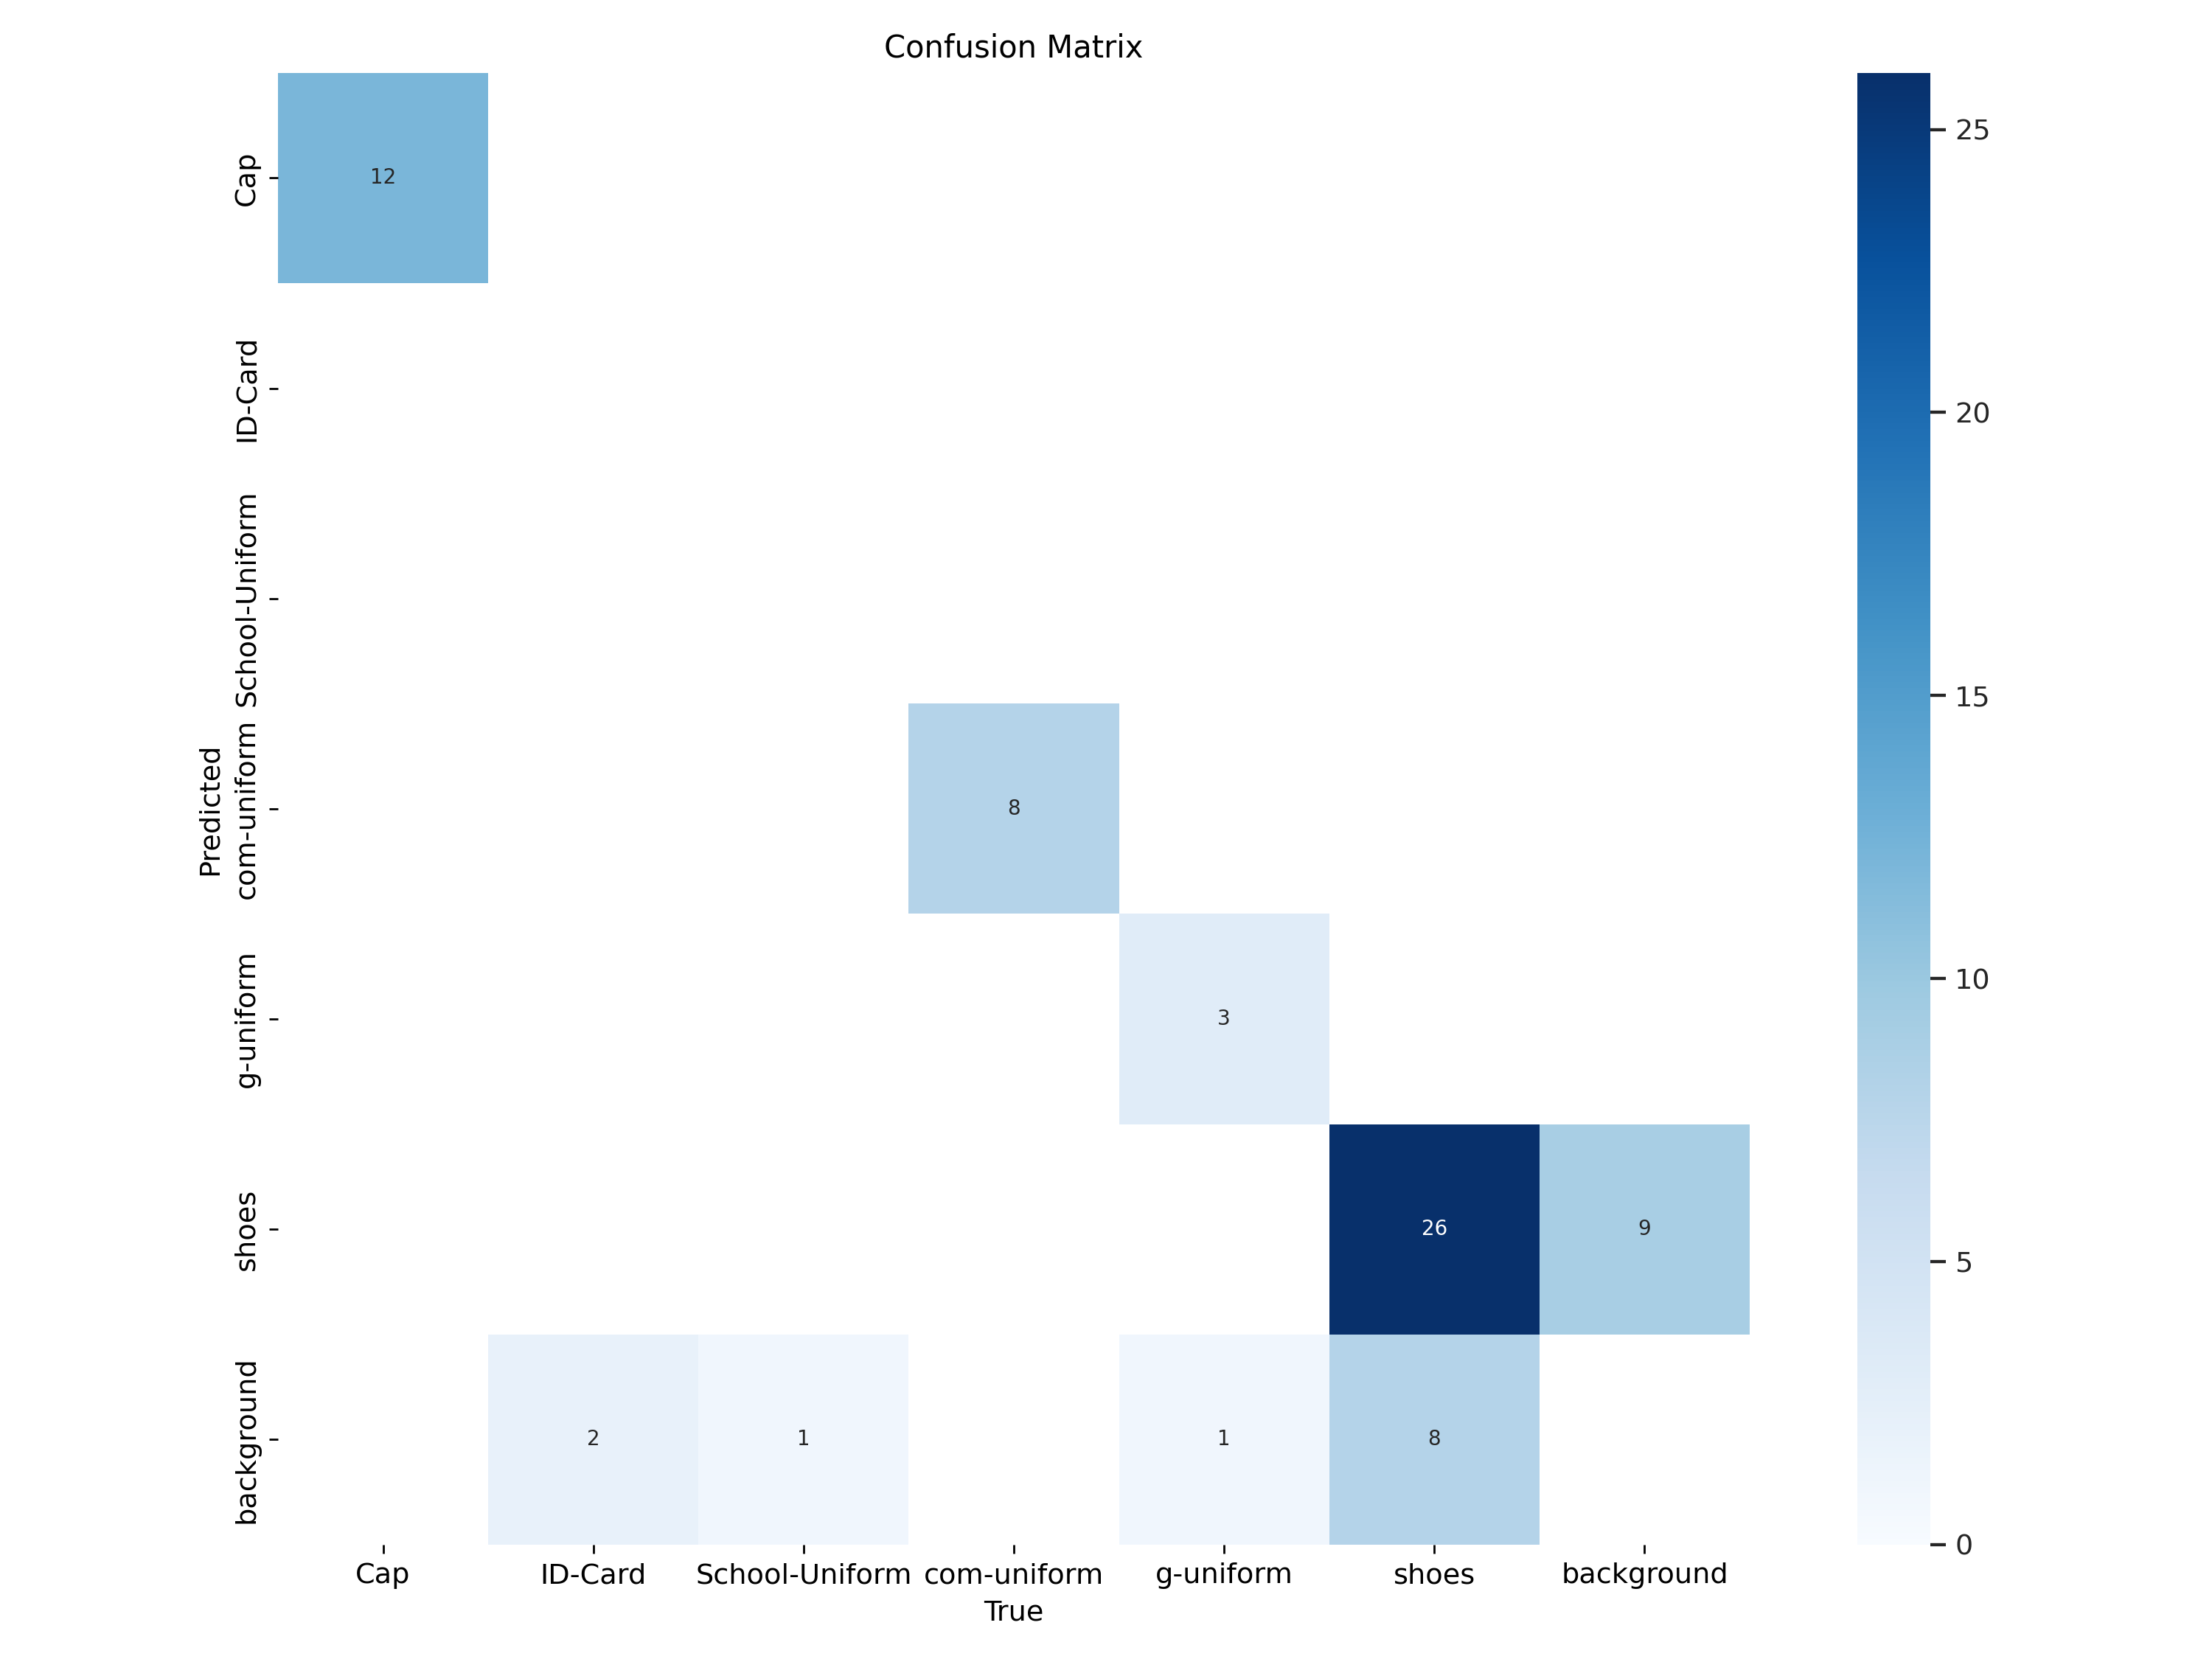

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

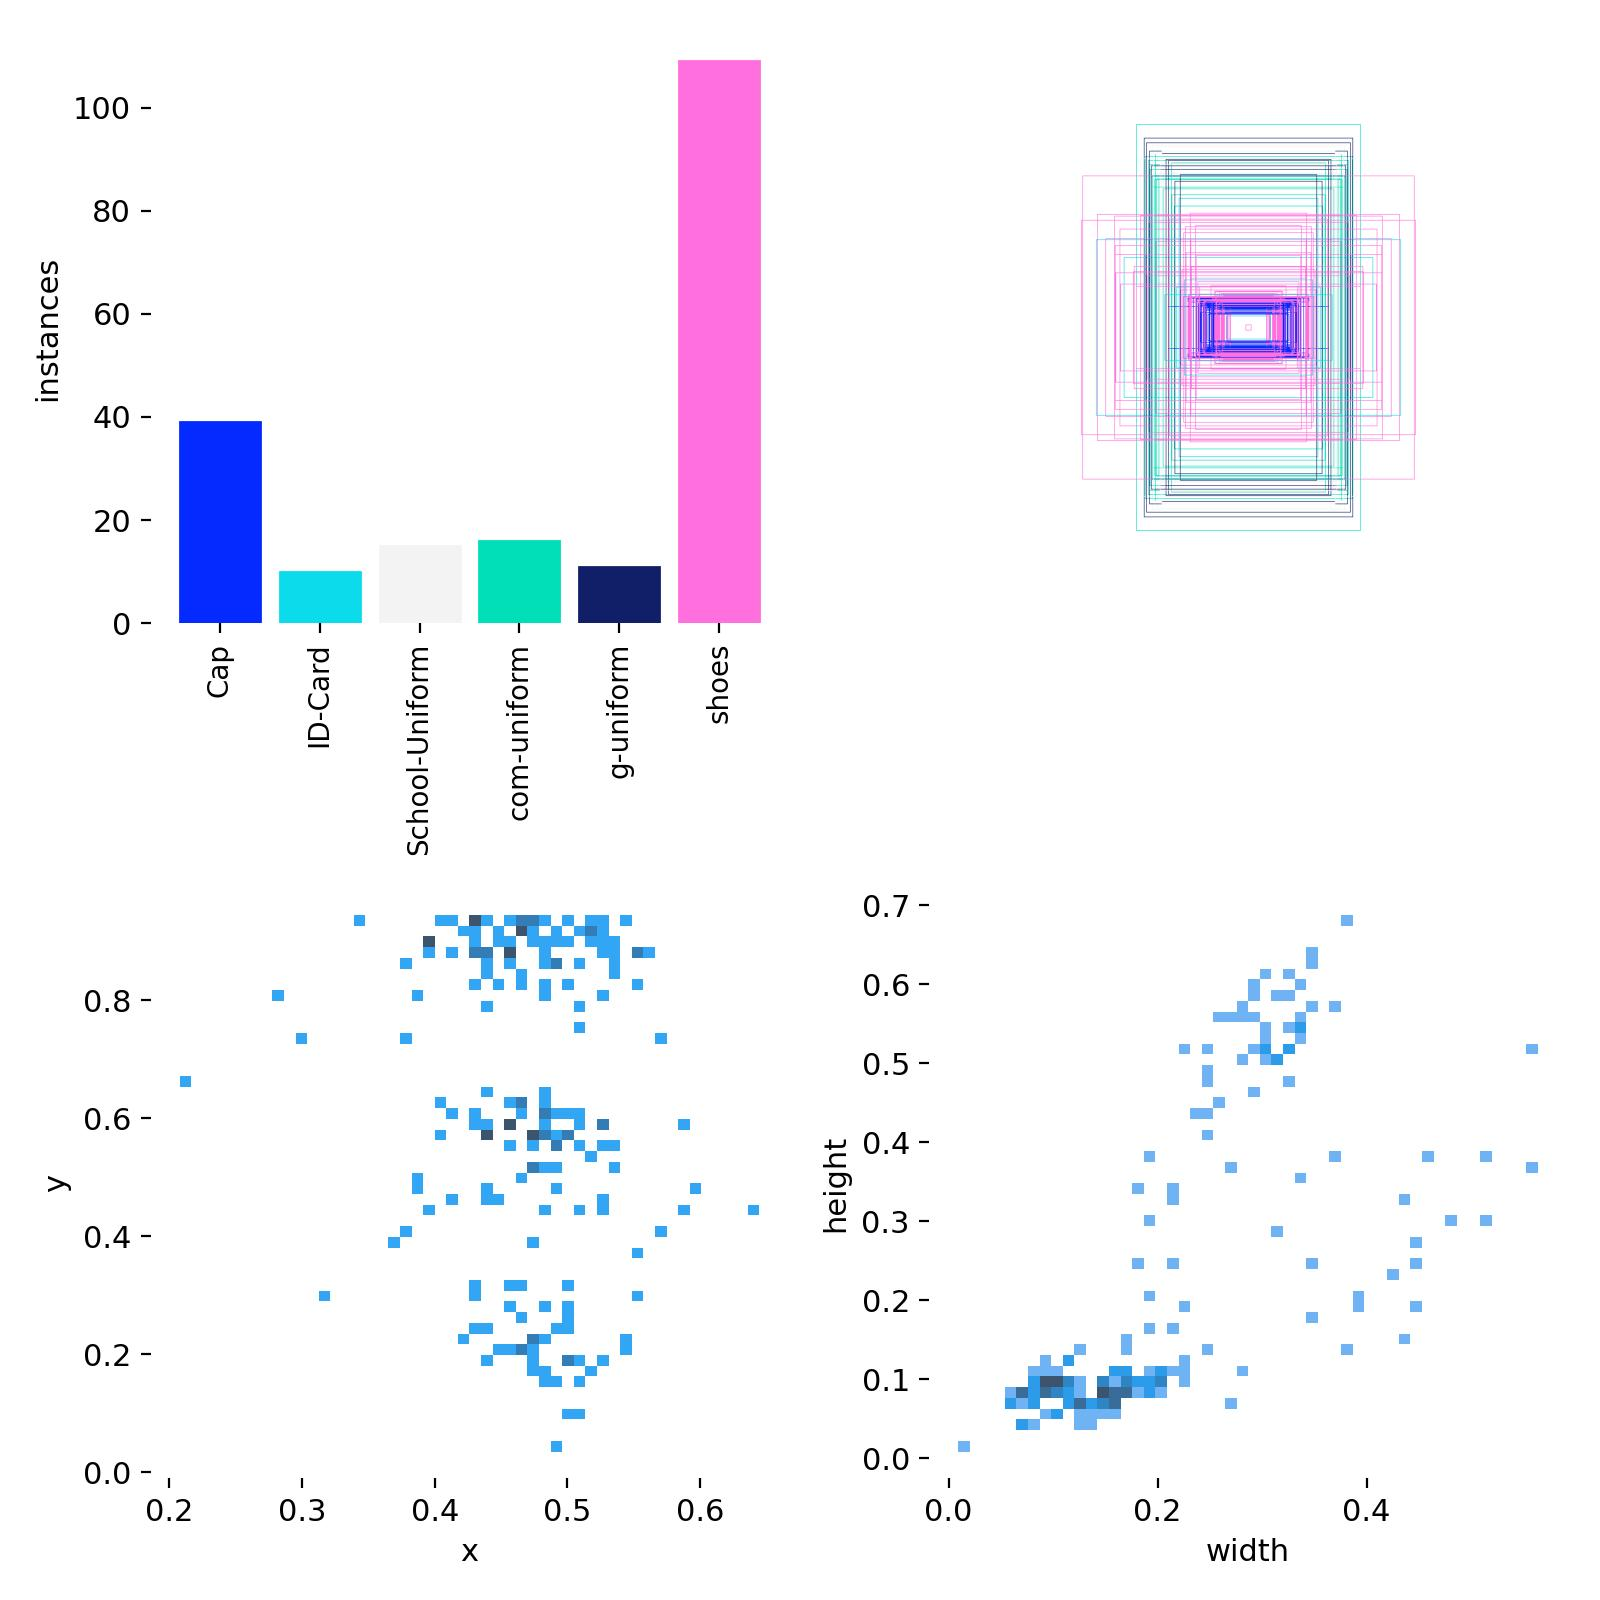

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

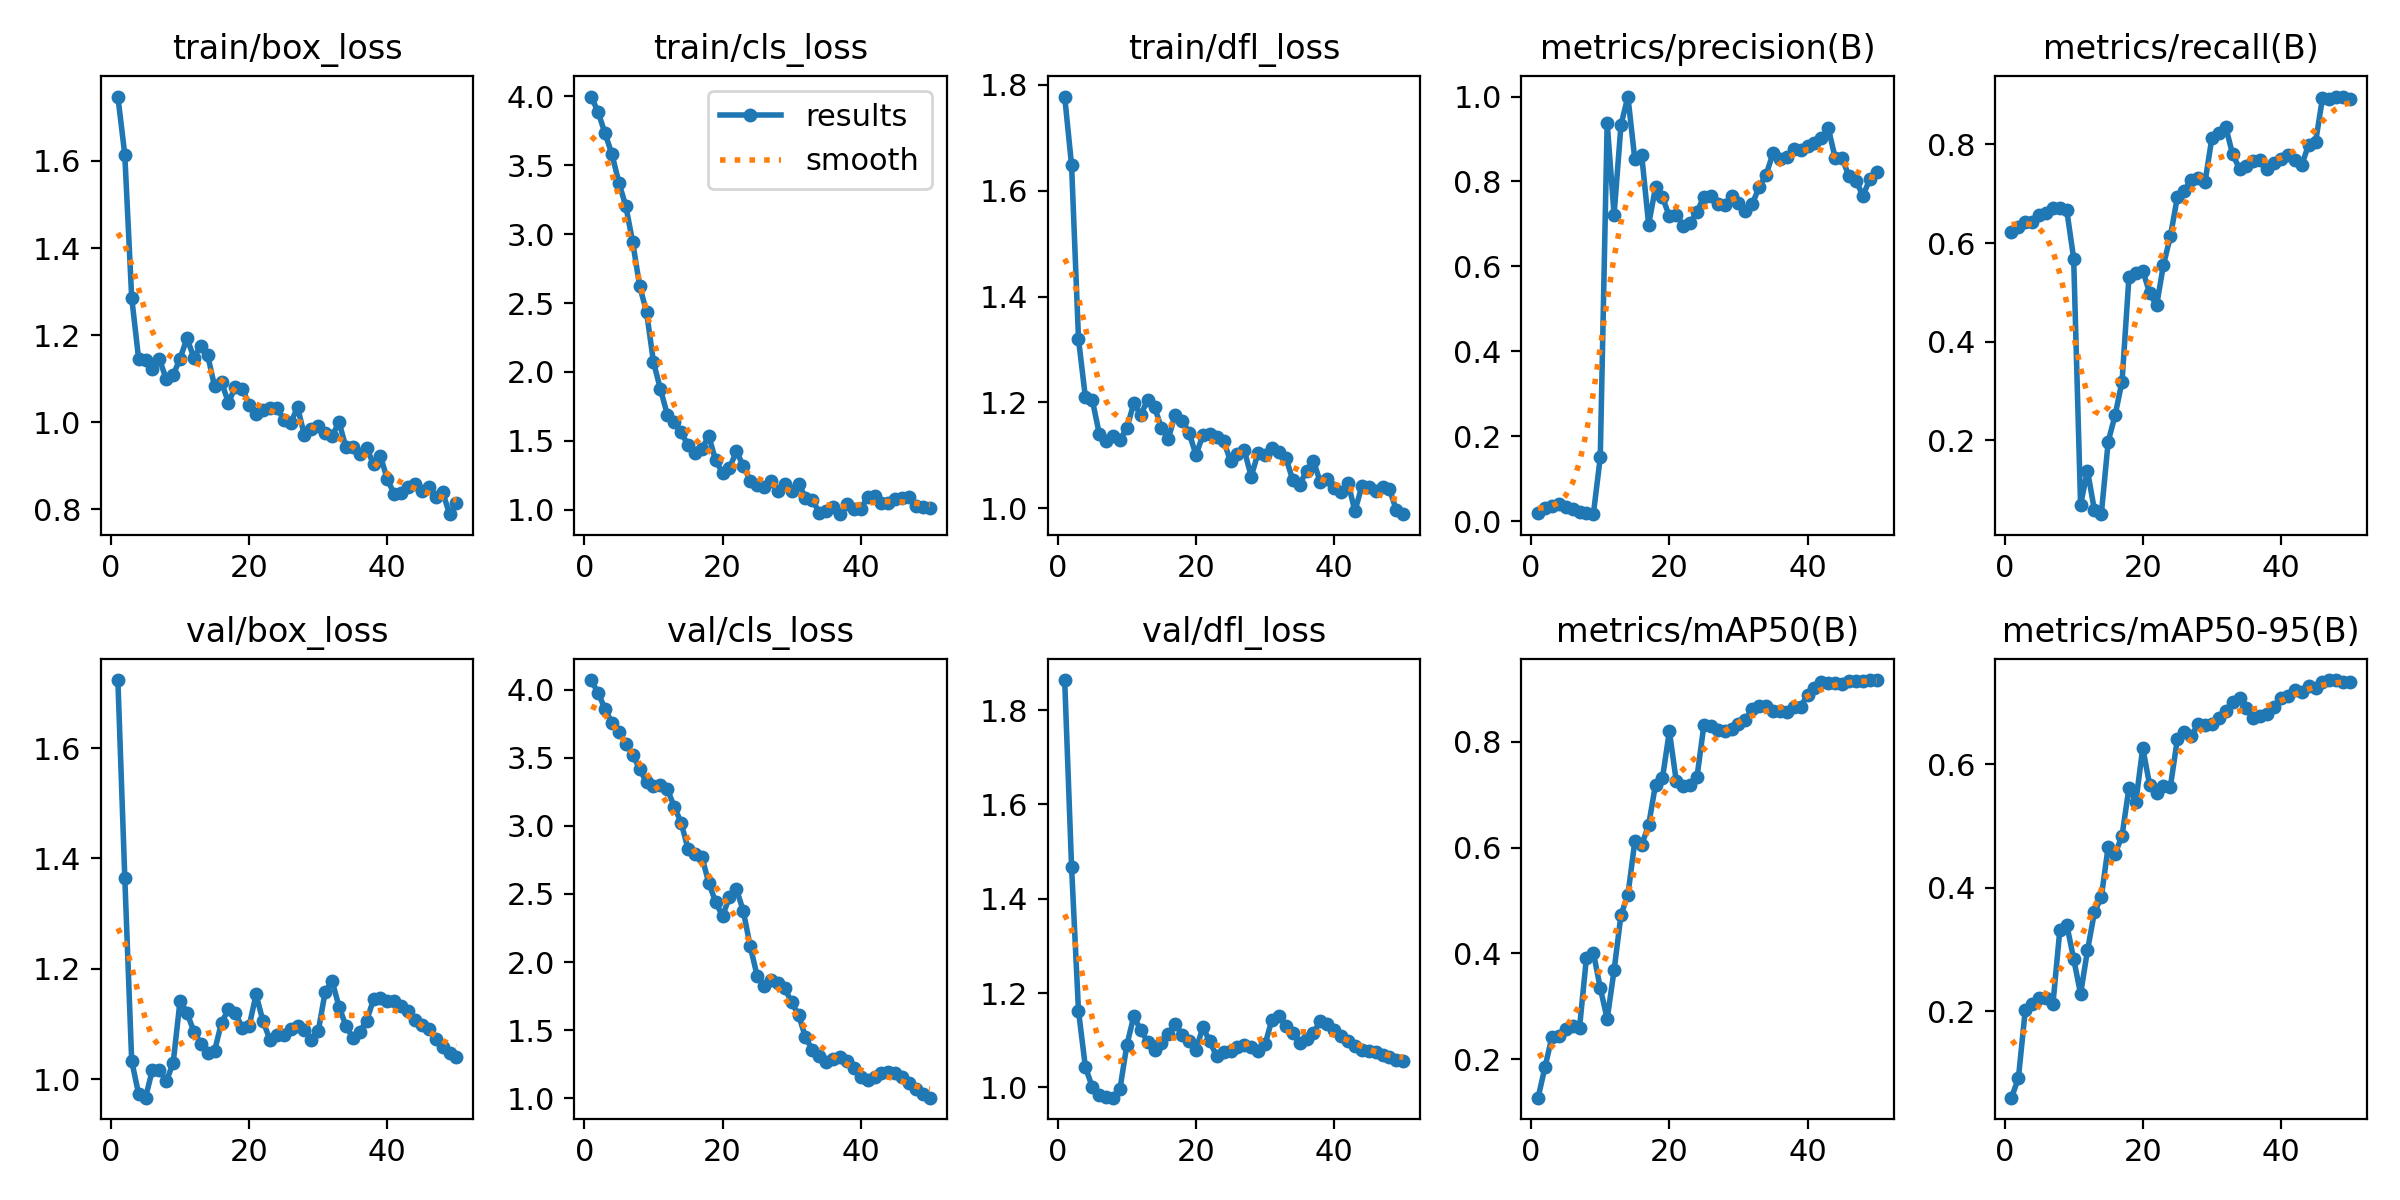

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

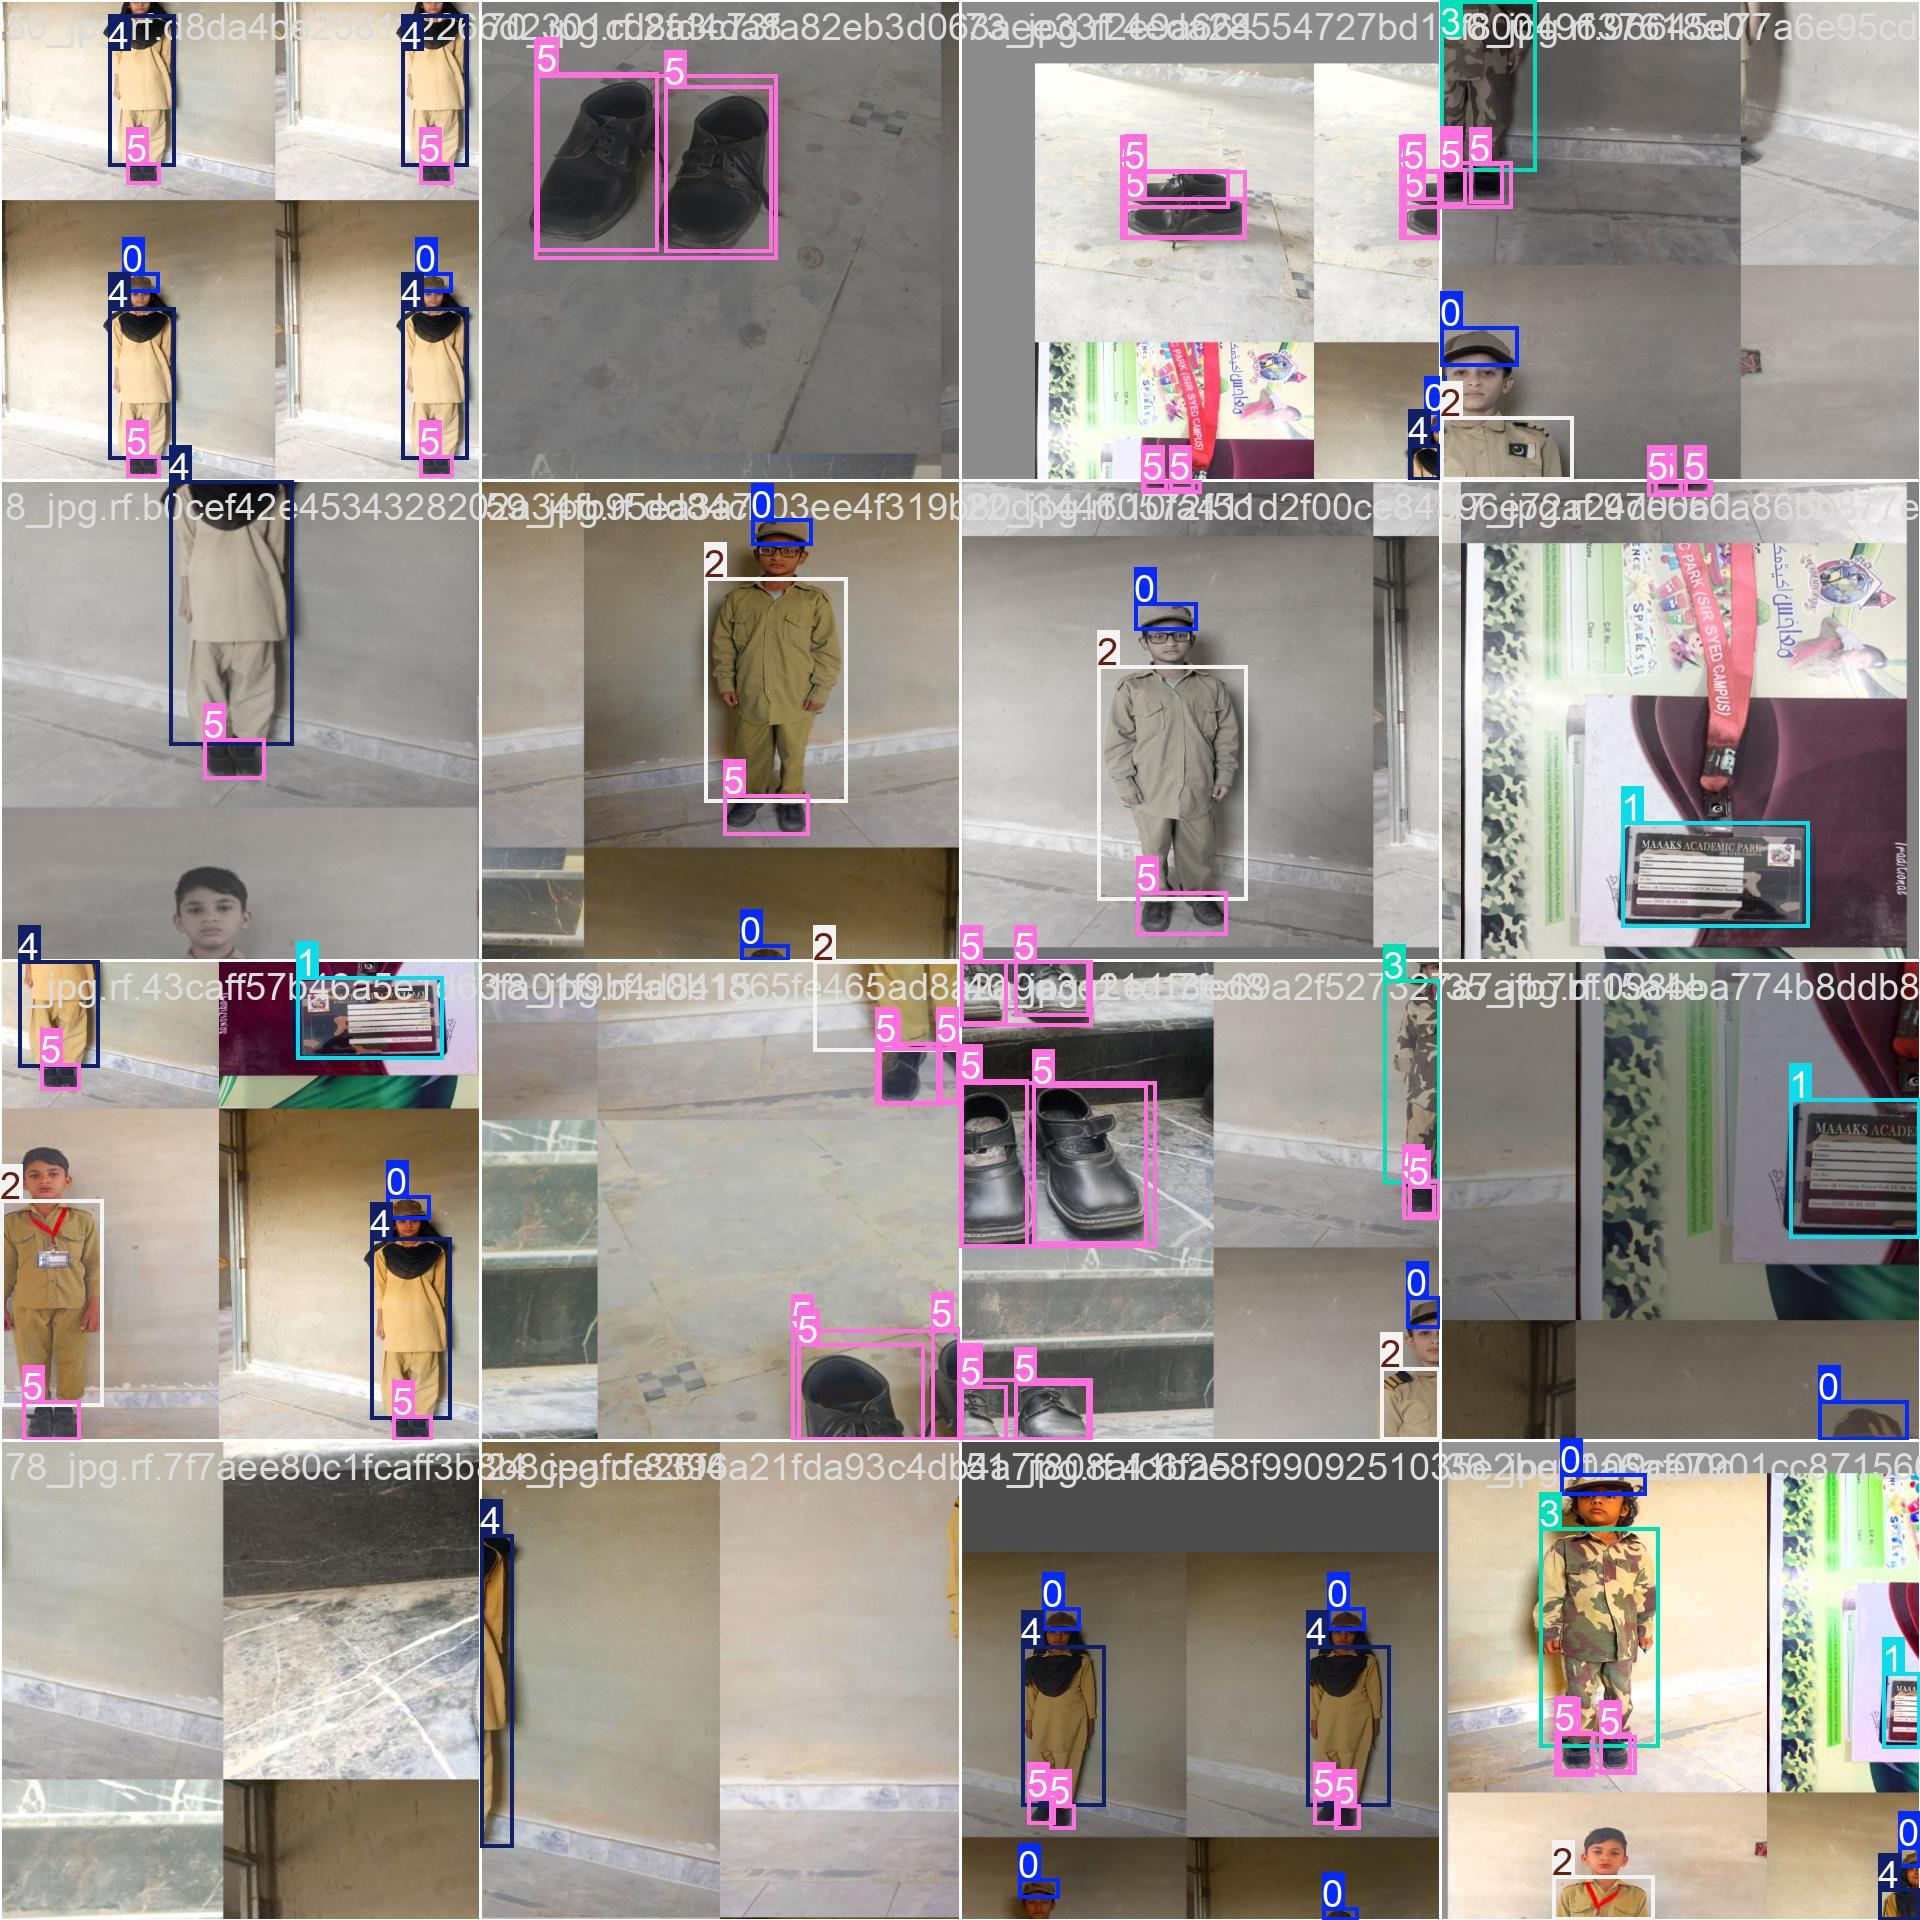

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

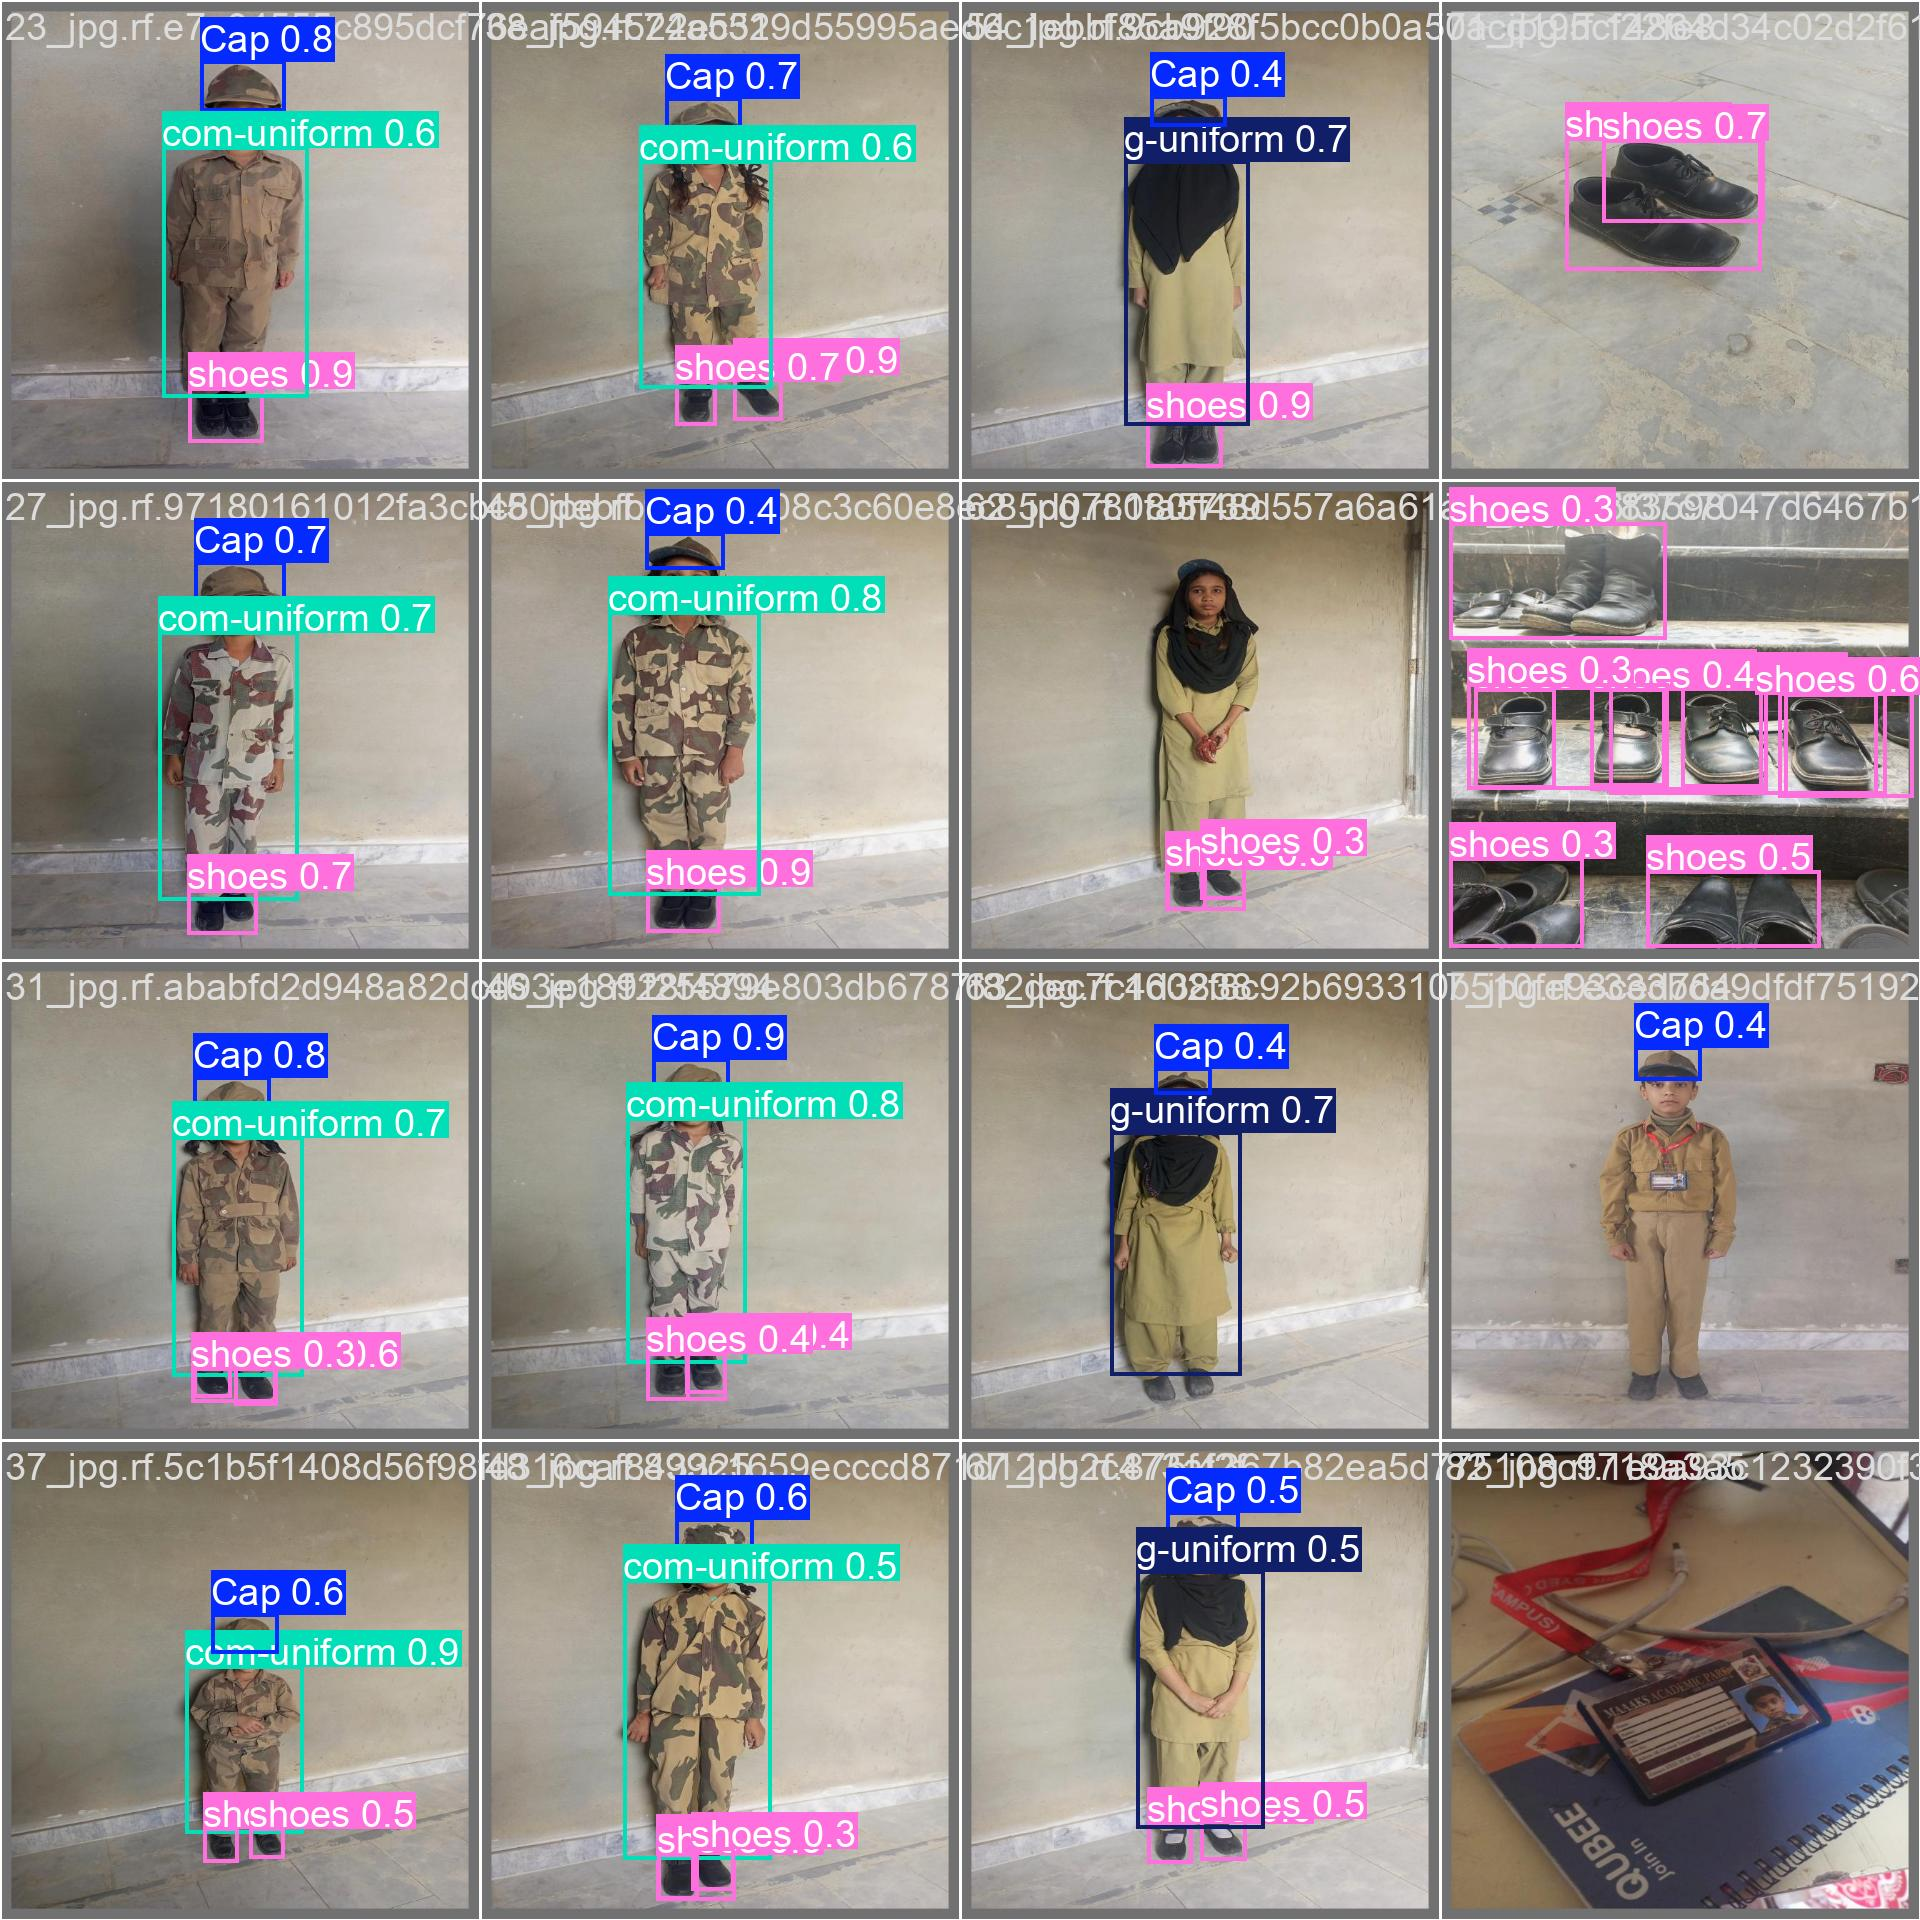

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

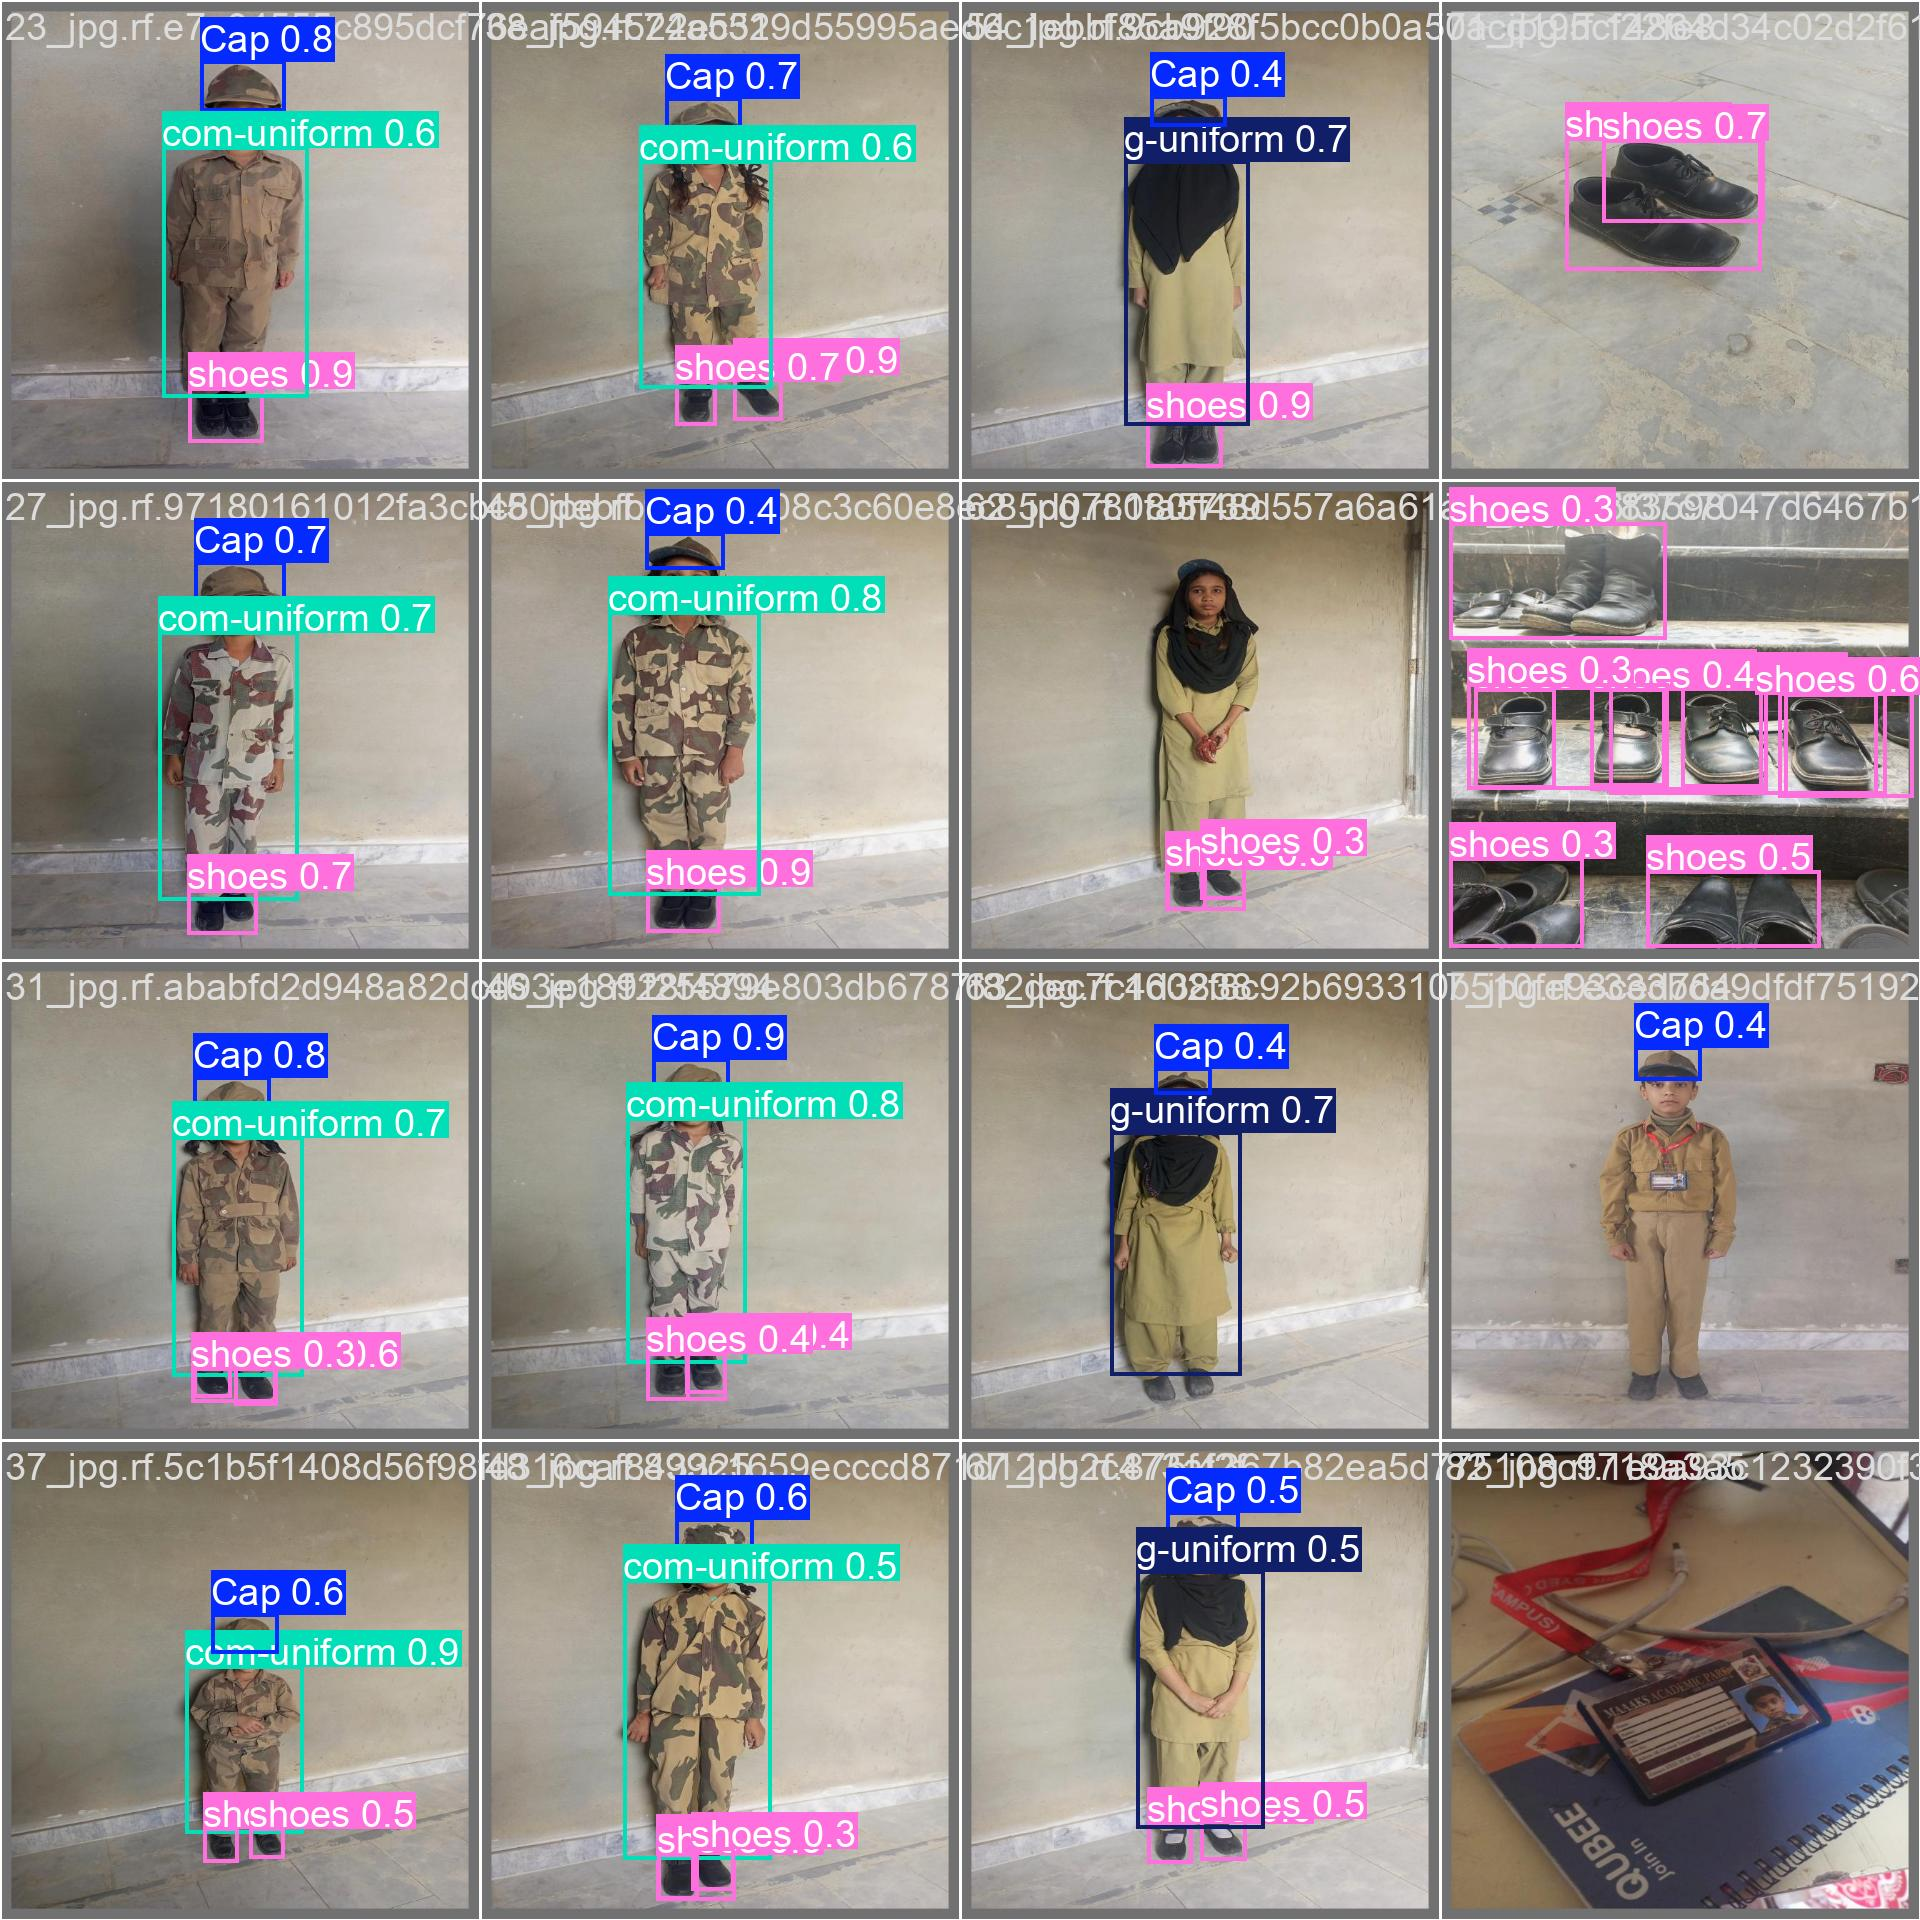

In [ ]:
#Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

**Step # 07  Validate Fine-Tuned Model**

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/uniform-detection-3/valid/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100% 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.38s/it]
                   all         16         61      0.802      0.892      0.914      0.733
                   Cap         12         12      0.933          1      0.995      0.693
               ID-Card          2          2      0.698        0.5      0.695      0.477
        School-Uniform          1          1      0.762          1      0.995      0.895
           com-uniform          8          8      0.908          1      0.995      0.935
             g-uniform          4          4      0.902          1      0.995      0.889
                 shoes         14         34   

**Step # 08 Inference with Custom Model on Images**

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

image 1/8 /content/uniform-detection-3/test/images/14_jpg.rf.f25ca8af0fa6fdfee7b15a570f67478c.jpg: 640x640 1 Cap, 1 School-Uniform, 3 shoess, 13.7ms
image 2/8 /content/uniform-detection-3/test/images/16_jpg.rf.6ca8df9b61e51cb92d7bf9b06cf0e963.jpg: 640x640 1 Cap, 1 com-uniform, 3 shoess, 8.8ms
image 3/8 /content/uniform-detection-3/test/images/1_jpg.rf.439a9b5a4799b4e494339cb2a9b5f6fb.jpg: 640x640 1 ID-Card, 8.9ms
image 4/8 /content/uniform-detection-3/test/images/25_jpg.rf.a529dafc99f139e15a73c6d3fb185f4c.jpg: 640x640 1 Cap, 1 com-uniform, 3 shoess, 8.2ms
image 5/8 /content/uniform-detection-3/test/images/28_jpg.rf.48511f72088b863b1093bd3976333753.jpg: 640x640 1 com-uniform, 2 shoess, 8.1ms
image 6/8 /content/uniform-detection-3/test/images/30_jpg.rf.fdefc7105a8cb0ec39a4bb019d7d8cde.jpg: 640x640 (no detections), 7.8ms
imag

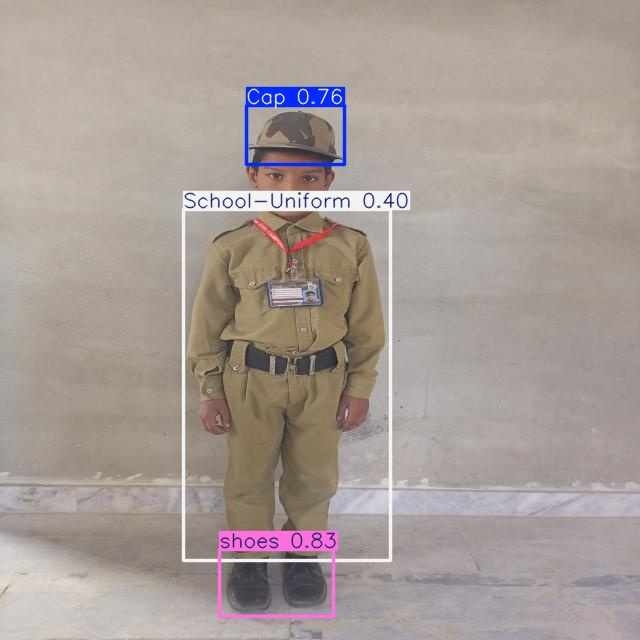

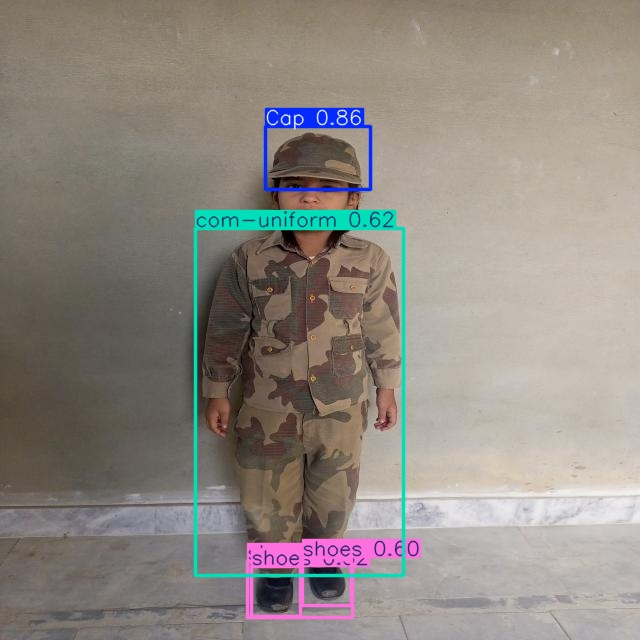

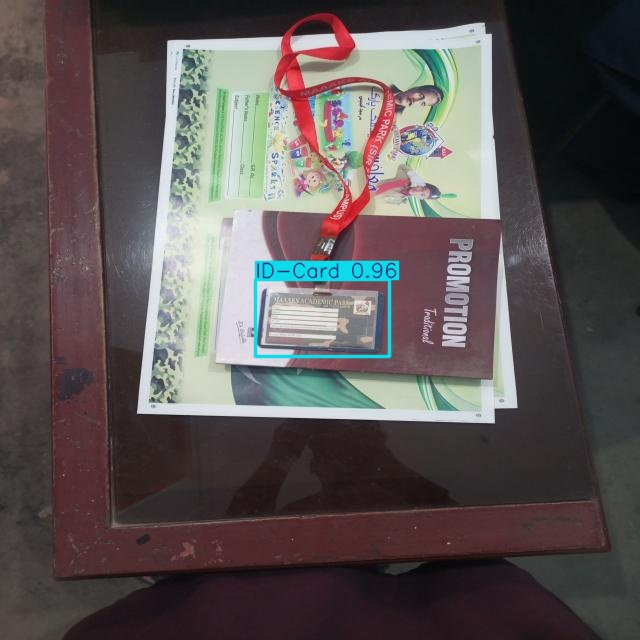

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/MergedImages.png" save=True

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/MergedImages.png: 192x640 2 Caps, 1 com-uniform, 1 g-uniform, 4 shoess, 68.3ms
Speed: 4.3ms preprocess, 68.3ms inference, 898.7ms postprocess per image at shape (1, 3, 192, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


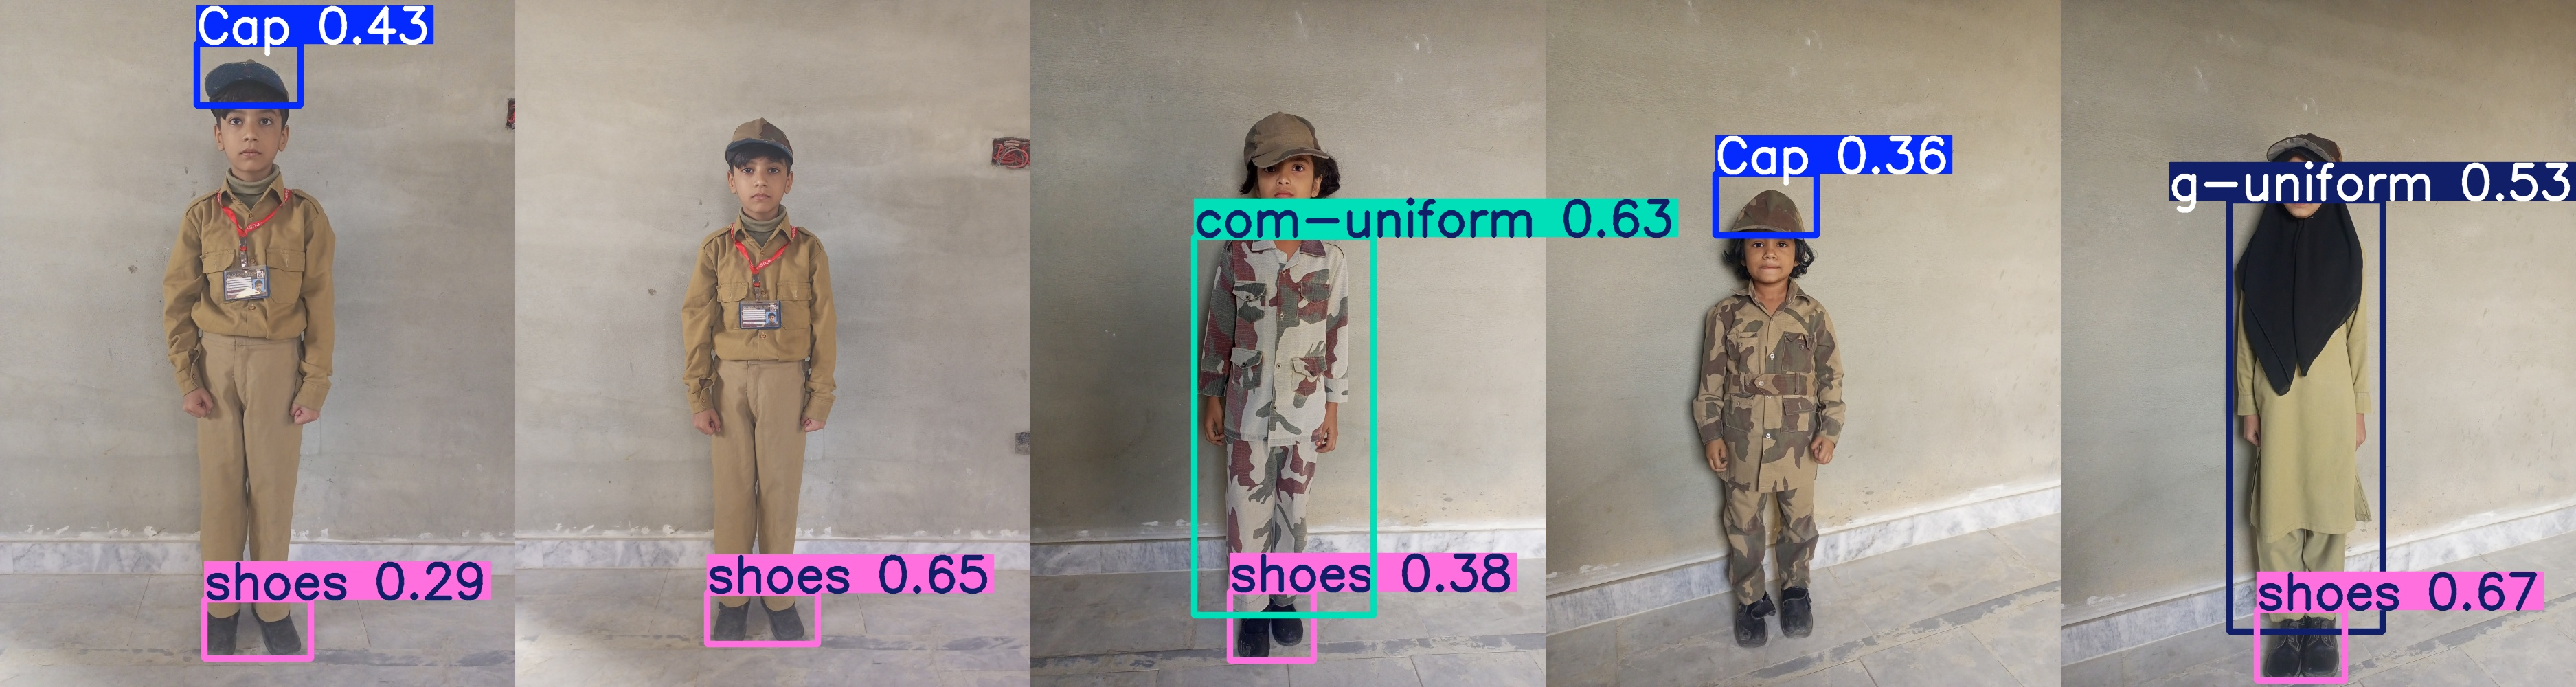

In [ ]:
Image("/content/runs/detect/predict2/MergedImages.jpg", width=600)

**Step # 08 Inference with Custom Model on Videos**

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/VID_20241216_115920.mp4" save=True

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/1829) /content/VID_20241216_115920.mp4: 640x384 (no detections), 59.9ms
video 1/1 (frame 2/1829) /content/VID_20241216_115920.mp4: 640x384 (no detections), 9.2ms
video 1/1 (frame 3/1829) /content/VID_20241216_115920.mp4: 640x384 (no detections), 8.4ms
video 1/1 (frame 4/1829) /content/VID_20241216_115920.mp4: 640x384 (no detections), 9.0ms
video 1/1 (frame 5/1829) /content/VID_20241216_115920.mp4: 640x384 (no detections), 9.4ms
video 1/1 (frame 6/1829) /content/VID_20241216_115920.mp4: 640x384 (no detections), 9.3ms
video 1/1 (frame 7/1829) /content/VID_20241216_115920.mp4: 640x384 (no detections), 9.4ms
video 1/1 (frame 8/1829) /content/VID_20241216_115920.mp4: 640x384 (no detections), 10.0ms
video 1/1 (frame 9/1829) /content/VID_20241216_115920.mp4: 640x384 (no detections), 9.7ms
video 1/1 (frame 10/18

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/VID_20241216_115920.avi'

# Compressed video path
compressed_path = "/content/drive/MyDrive/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.